**К сожалению, не все графики plotly отображаются на github. Пожалуйста, откройте файл у себя, и все графики отобразятся.**

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [36]:
data = pd.read_csv('vgsales.csv')

In [37]:
data

Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sports    Nintendo     41.49     29.02      3.77   
1      1985.0      Platform    Nintendo     29.08      3.58      6.81   
2      2008.0        Racing    Nintendo     15.85     12.88      3.79   
3      2009.0        Sports    Nintendo     15.75     11.01      3.28   
4      1996.0  Role-Playing    Nintendo     11.27      8.89     10.22   
...       ...           ...         ...       ...       ...       ...   
16593  2002.0      Platform       Kemco      0.01      0.00      0.00   
16594  2003.0       Shooter  Infogrames      0.01      0.00      0.00   
16595  2008.0        Racing  Activision      0.00      0.00      0.00   
16596  2010.0        Puzzle    7G//AMES      0.00      0.01      0.00   
16597  2003.0      Platform     Wanadoo      0.01      0.00      0.00   

       Other_Sales  Global_Sales  
0             8.46         82.74  
1             0.77         40.24  
2             3.31         35.82  
3             2.96         33.00  
4             1.00         31.37  
...            ...           ...  
16593         0.00          0.01  
16594         0.00          0.01  
16595         0.00          0.01  
16596         0.00          0.01  
16597         0.00          0.01  

[16598 rows x 11 columns]

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [39]:
data.dropna(inplace = True)

In [40]:
data.drop('Rank', axis = 1, inplace = True)

In [41]:
data['Name'] = data['Name'].astype('string')
data['Platform'] = data['Platform'].astype('category')
data['Year'] = data['Year'].astype('int')
data['Genre'] = data['Genre'].astype('category')
data['Publisher'] = data['Publisher'].astype('category')

In [42]:
data.dtypes

Name            string[python]
Platform              category
Year                     int32
Genre                 category
Publisher             category
NA_Sales               float64
EU_Sales               float64
JP_Sales               float64
Other_Sales            float64
Global_Sales           float64
dtype: object

______

## Вопросы

1. Cколько всего продаж у каждой платформы? Какой тренд продаж у 10 наиболее крупных платформ?

2. Правда ли, что у игры появившейся позже 2000 г. в среднем продаж больше, чем у игры, выпущенной ранее 2000 г.?

3. Правда ли, что в каждый год в Америке и Европе суммарно продаж больше чем в Японии и в других странах вместе взятых?

4. У какого издателя больше всего продаж? Какие средние продажи у 5 наиболее крупных издателей?

5. Какой жанр пользуется большей популярностью по продажам на каждом промежутке длиной в 10 лет с 1980 г. по 2019 г.? Отличаются ли любимые жанры в Америке, в Европе, в Японии на каждом промежутке?

6. Правда ли, что с каждым годом значения общих продаж увеличиваются? Какой тренд по странам?

7. Какие игры входят в топ самых продаваемых игр в Америке, в Европе, в Японии и в остальных странах?

______

### Cколько всего продаж у каждой платформы? Какой тренд продаж у 10 наиболее крупных платформ?

In [69]:
df = data.groupby(by="Platform")[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum().sort_values('Global_Sales', ascending = False)
df.head(10)

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Platform                                                         
PS2         572.92    332.63    137.54       190.47       1233.46
X360        594.33    278.00     12.30        84.67        969.60
PS3         388.90    340.47     79.21       140.81        949.35
Wii         497.37    264.35     68.28        79.20        909.81
DS          388.53    194.05    175.02        60.29        818.91
PS          334.71    212.38    139.78        40.69        727.39
GBA         178.43     72.49     46.56         7.51        305.62
PSP         107.09     67.16     75.89        41.52        291.71
PS4          96.80    123.70     14.30        43.36        278.10
PC           92.04    137.35      0.17        24.33        254.70

In [70]:
df.shape

(31, 5)

Всего платформ - 31. Выведем для каждой платформы общие продажи.

In [71]:
df.head(31)['Global_Sales']

Platform
PS2     1233.46
X360     969.60
PS3      949.35
Wii      909.81
DS       818.91
PS       727.39
GBA      305.62
PSP      291.71
PS4      278.10
PC       254.70
GB       254.42
XB       252.09
NES      251.07
3DS      246.27
N64      218.21
SNES     200.05
GC       197.14
XOne     141.06
2600      86.57
WiiU      81.86
PSV       61.60
SAT       33.59
GEN       28.36
DC        15.97
SCD        1.87
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: Global_Sales, dtype: float64

Для наглядности построим график с продажами для каждой платформы.

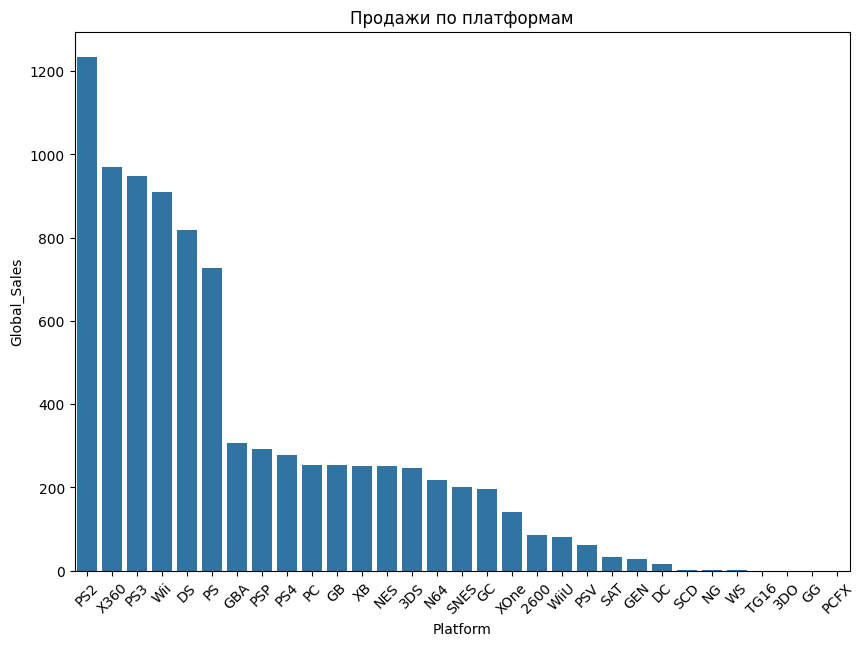

In [72]:
plt.figure(figsize=(10,7)) 
sns.barplot(x = df.index, y = 'Global_Sales', data = df, order = df.index).set_title('Продажи по платформам')
plt.xticks(rotation=45)
plt.show()

Ответим на 2-ой вопрос: какой тренд продаж у 10 наиболее крупных платформ? 

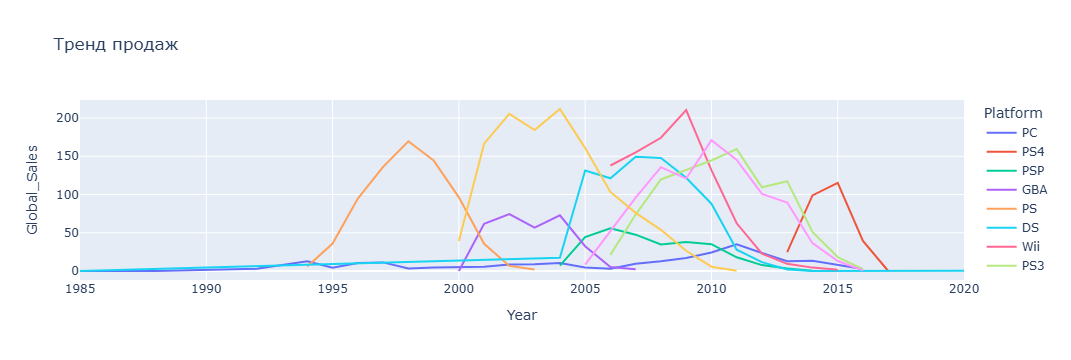

In [73]:
x = df.head(10)
ten = list(x.index.values) #10 наиболее крупных платформ
res = pd.DataFrame()
for one in ten:
    aux = data[data['Platform'] == one][['Year', 'Global_Sales']].groupby('Year').sum()
    aux['Platform'] = one
    aux = aux.reset_index()
    res = pd.concat([aux,res], sort = False, axis = 0)
res = res.reset_index()
res.head(10)

fig = px.line(res, x="Year", y="Global_Sales", color='Platform', title = 'Тренд продаж')
fig.show()

### Правда ли, что у игры появившейся позже 2000 г. в среднем продаж больше, чем у игры, выпущенной ранее 2000 г.?

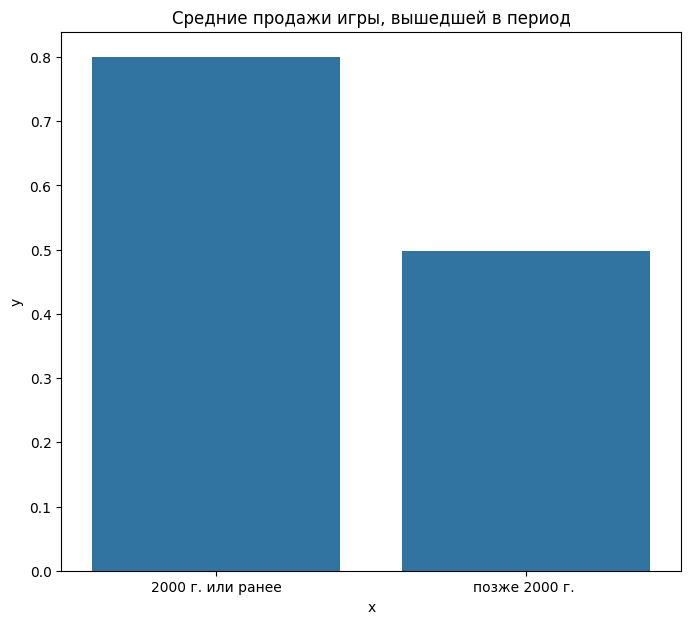

In [75]:
datal2000 = data[data['Year'] <= 2000]
datagr2000 = data[data['Year'] > 2000]

plt.figure(figsize=(8,7)) 
d = {'x': ['2000 г. или ранее', 'позже 2000 г. '], 
     'y': [datal2000['Global_Sales'].mean(), datagr2000['Global_Sales'].mean()]}
sns.barplot(x='x', y='y', data=d).set_title('Средние продажи игры, вышедшей в период')
plt.show()

Видим, что средние продажи игры, выпущенной до 2000 г. больше, чем для игры, выпущенной после 2000 г.

Думаю уменьшение средних продаж связано с тем, что позже 2000 г. больше игр было выпущено, и скорее всего больше игр имели продажи меньше 1 млн. Проверим это.

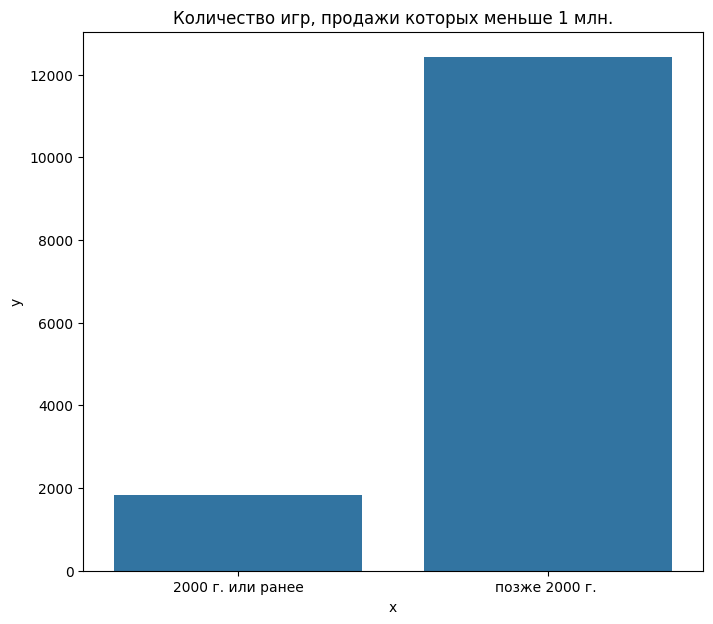

In [49]:
plt.figure(figsize=(8,7)) 
d = {'x': ['2000 г. или ранее', 'позже 2000 г. '], 
     'y': [datal2000[datal2000['Global_Sales'] <= 1].count()['Global_Sales'], datagr2000[datagr2000['Global_Sales'] <= 1].count()['Global_Sales']]}
sns.barplot(x='x', y='y', data=d).set_title('Количество игр, продажи которых меньше 1 млн.')
plt.show()

Действительно после 2000 г. количество непопулярных игр выросло в 6 раз по сравнению с играми, выпущенными в 2000 г. или раньше.

### Правда ли, что в каждый год в Америке и Европе суммарно продаж больше чем в Японии и в других странах вместе взятых?

Построим сразу график, в котором будет информация по каждому году.

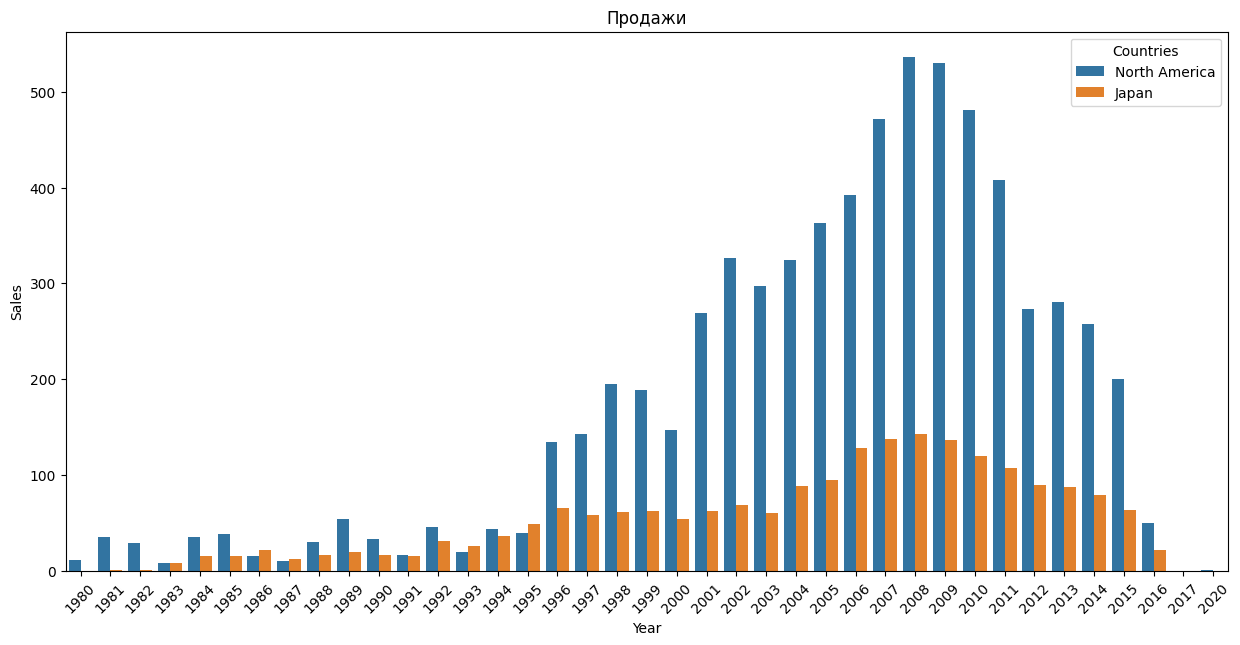

In [50]:
data['NA_plus_Eur'] = data['NA_Sales'] + data['EU_Sales']
data['Jp_plut_others'] = data['JP_Sales'] + data['Other_Sales']
df = data[['Year','NA_plus_Eur','Jp_plut_others']]
dt = df.groupby(by="Year").sum()
dt = dt.reset_index()

df = pd.melt(dt[['Year','NA_plus_Eur', 'Jp_plut_others']], id_vars="Year", var_name="Countries", value_name="Sales")

plt.figure(figsize=(15,7)) 
ax = sns.barplot(x = 'Year', y = 'Sales', hue = 'Countries', data = df)
ax.set_title('Продажи')
plt.xticks(rotation=45)
labels=["North America","Japan"]
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Countries")
plt.show()

Продажи в Америке и Европе суммарно почти в каждой год больше, чем в Японии и остальных странах за исключением 1993 г. и 1995 г. Более подробно посмотрим, какие игры вышли в эти годы.

In [51]:
games = data[((data['Year'] == 1995) | (data['Year'] == 1993)) & (data['NA_plus_Eur'] < data['Jp_plut_others'])][['Name', 'Year', 'NA_plus_Eur','Jp_plut_others']]
games.head(15)

Name  Year  NA_plus_Eur  Jp_plut_others
426   Dragon Quest VI: Maboroshi no Daichi  1995         0.00            3.19
670                   Kirby's Dream Land 2  1995         0.83            1.53
688                         Chrono Trigger  1995         0.28            2.03
849                Super Street Fighter II  1993         0.68            1.32
888                       Virtua Fighter 2  1995         0.60            1.33
948                         Secret of Mana  1993         0.32            1.51
1054                       Super Puyo Puyo  1993         0.00            1.70
1325                         Dragon Ball Z  1993         0.00            1.45
1521                      Romancing SaGa 3  1995         0.00            1.30
1674       Dragon Ball Z: La Legende Saien  1993         0.00            1.20
1729                      Romancing SaGa 2  1993         0.00            1.17
1753               Sega Rally Championship  1995         0.37            0.79
1771                    Derby Stallion III  1995         0.00            1.15
1777                   Dragon Quest I & II  1993         0.00            1.15
1840                           Arc the Lad  1995         0.00            1.11

In [52]:
games.shape

(203, 4)

Всего 203 игры 1993 г. или 1995 г. для которых продажи в Америке и Европе меньше, чем в Японии и других странах. Если поискать информацию про некоторые из них, то появляется ощущение, что большинство разработчиков этих игр из Японии и скорее всего поэтому больше продаж было в стране разработчика.

### У какого издателя больше всего продаж? Какие средние продажи у 5 наиболее крупных издателей?

In [53]:
data

Name Platform  Year  \
0                                            Wii Sports      Wii  2006   
1                                     Super Mario Bros.      NES  1985   
2                                        Mario Kart Wii      Wii  2008   
3                                     Wii Sports Resort      Wii  2009   
4                              Pokemon Red/Pokemon Blue       GB  1996   
...                                                 ...      ...   ...   
16593                Woody Woodpecker in Crazy Castle 5      GBA  2002   
16594                     Men in Black II: Alien Escape       GC  2003   
16595  SCORE International Baja 1000: The Official Game      PS2  2008   
16596                                        Know How 2       DS  2010   
16597                                  Spirits & Spells      GBA  2003   

              Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0            Sports    Nintendo     41.49     29.02      3.77         8.46   
1          Platform    Nintendo     29.08      3.58      6.81         0.77   
2            Racing    Nintendo     15.85     12.88      3.79         3.31   
3            Sports    Nintendo     15.75     11.01      3.28         2.96   
4      Role-Playing    Nintendo     11.27      8.89     10.22         1.00   
...             ...         ...       ...       ...       ...          ...   
16593      Platform       Kemco      0.01      0.00      0.00         0.00   
16594       Shooter  Infogrames      0.01      0.00      0.00         0.00   
16595        Racing  Activision      0.00      0.00      0.00         0.00   
16596        Puzzle    7G//AMES      0.00      0.01      0.00         0.00   
16597      Platform     Wanadoo      0.01      0.00      0.00         0.00   

       Global_Sales  NA_plus_Eur  Jp_plut_others  
0             82.74        70.51           12.23  
1             40.24        32.66            7.58  
2             35.82        28.73            7.10  
3             33.00        26.76            6.24  
4             31.37        20.16           11.22  
...             ...          ...             ...  
16593          0.01         0.01            0.00  
16594          0.01         0.01            0.00  
16595          0.01         0.00            0.00  
16596          0.01         0.01            0.00  
16597          0.01         0.01            0.00  

[16291 rows x 12 columns]

In [54]:
dt = data.groupby(by="Publisher").count()
df = data.groupby(by="Publisher")[['Global_Sales']].sum()
dt['Global_Sales'] = df['Global_Sales']
dt.rename(columns = {'Name':'Count'}, inplace = True)
dt['Mean'] = round(dt['Global_Sales']/dt['Count'], 2)

px.scatter(data_frame = dt, x = 'Count', y = dt.index, size = 'Global_Sales') 

Здесь по оси x откладывается количество выпущенных игр, а по оси y издатель. Видно, что у Electonic Arts больше всего выпущенных игр, затем идет Activision, Namco Bandai Games, Ubisoft и др. Размер кружка отвечает за продажи. Чем больше круг, тем больше и продаж. Здесь отчетливо видно, что самый большой круг соответствует издателю Nintendo. Причем Nintendo не находится в первой пятерке издателей по количеству игр. 

In [55]:
px.scatter(data_frame = dt, x = 'Count', y = dt.index, size = 'Global_Sales', color = 'Mean') 

Мне кажется, информативнее смотреть на средние продажи издателя. Цвет на графике выше соответствует среднему значению издателя. Чем цвет желтее, тем выше среднее значение. И если посмотреть на самых крупных издаетелей по количеству выпускаемых игр, то видно, что средние продажи у них меньше 1 за исключением Nintendo. 

In [56]:
px.scatter(data_frame = dt[dt['Count'] > 5], x = 'Mean', y = dt[dt['Count'] > 5].index, color = 'Count') 

Если на оси X откладывать значение среднего, на оси Y - издателя, а цветом обозначать количество игр, то график изменится. Видно, что Nintendo находится правее остальных издателей, которые выпустили как минимум 6 игр. После Nintendo идут издатели: Sony Computer Entertainment Europe, Microsoft Games Studios и др. Количество выпускаемых игр Sony Computer Entertainment Europe и Microsoft Games Studios суммарно намного меньше, чем у Nintendo, что говорит о том, что Nintendo довольно успешный издатель, если брать в расчет количество выпускаемых игр и средние продажи, потому что по обоим параметрам этот издатель занимает первые позиции. 

### Какой жанр пользуется большей популярностью по продажам на каждом промежутке длиной в 10 лет с 1980 г. по 2019 г.? Отличаются ли любимые жанры в Америке, в Европе, в Японии на каждом промежутке?

Построим графики для каждому периода. Период можно выбирать и переключать. Также график можно приближать.

In [57]:
df = data[data['Year'] < 2020][['Year','Name','Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']]
period_length = 10
start_year = 1980
end_year = 2019
starts = np.arange(start_year, end_year, period_length).tolist()
tuples = [(start, start+period_length) for start in starts]
bins = pd.IntervalIndex.from_tuples(tuples, closed='left')
original_labels = list(bins.astype(str))
new_labels = ['{} - {}'.format(b.strip('[)').split(', ')[0], int(b.strip('[)').split(', ')[1])-1) for b in original_labels]
label_dict = dict(zip(original_labels, new_labels))
df['PERIOD'] = pd.cut(df['Year'], bins=bins, include_lowest=True, precision=0)
df['PERIOD'] = df['PERIOD'].astype("str")
df = df.replace(label_dict)
px.box(df, x = 'Genre', y = 'Global_Sales', color = 'PERIOD', hover_name = 'Name')

Для каждого жанра и на каждом периоде посмотрим на медианы. Жанр у которого медиана наибольшая и будет считать самым популярным жанром периода.

Период 1980 - 1989: у жанра Adventure медиана самая большая - 2.39 млн.

Период 1990 - 1999: у жанра Platform медиана самая большая - 0.56 млн.

Период 2000 - 2009: у жанра Platform медиана самая большая - 0.22 млн.

Период 2010 - 2019: у жанра Shooter медиана самая большая - 0.41 млн.

Но при просмотре были замечаны интересные моменты по некоторым периодам, которые хочется отразить: 

Период 1980 - 1989: отсуствуют экстремально продаваемые игры жанра Adventure, Racing, Sports, Role-Playing, Fighting, Misc, Simulation. Игр жанра Strategy в данный период в данных нет. Причем максимально продаваемые игры жанров: Platform, Puzzle, Shooter (Super Mario Bros, Tetris, Duck Hunt игры соответственно).

Период 1990 - 1999: лидер по продажам этого периода стала игра Pokemon Red/Pokemon Blue жанра Role-Playing. После выхода этой игры появилось аниме про покемонов. Продолжения игр марио жанра Platform по прежнему хорошо продаются.

Период 2000 - 2009: здесь абсолютный лидер по продажам Wii Sports. По данным ни одна другая игра не была настолько продаваемой, как она. Помимо этого у жанра Role-Playing повторно выпускают игры про покемонов, которые выбиваются по продажам по сравнению с остальными играми жанра Role-Playing

Период 2010 - 2019: появляются две игры Kinect Adventures! и Grand Theft Auto V жанров Misc и Action соответственно, которые по продажам не превосходят Tetris. Игры про марио и покемонов выходят до сих пор и по прежнему продаются в большом количестве.

In [58]:
px.box(df, x = 'Genre', y = 'NA_Sales', color = 'PERIOD', hover_name = 'Name')

In [59]:
px.box(df, x = 'Genre', y = 'EU_Sales', color = 'PERIOD', hover_name = 'Name')

In [60]:
px.box(df, x = 'Genre', y = 'JP_Sales', color = 'PERIOD', hover_name = 'Name')

При просмотре графиков для отдельных стран различий серьезных не наблюдалось по жанрам. Можно сказать, что популярные жанры у всех одинаковые.

### Правда ли, что с каждым годом значения общих продаж увеличиваются? Какой тренд по странам?

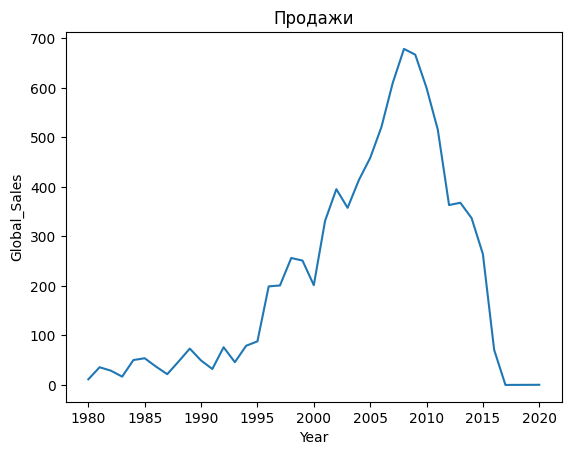

In [61]:
df = data[['Year', 'Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales']]
dt = df.groupby("Year").sum()
sns.lineplot(data = dt, x = dt.index, y = "Global_Sales").set_title('Продажи');

Значения продаж растут примерно до 2007 - 2009 года, а затем начинают спадать, поэтому значения продаж с каждый годом не увеличиваются. Наибольшее число продаж наблюдаются примерно в 2007 - 2009 г. Это связано вероятно с тем, что была выпущена одна из самых популярных игр Wii Sports, но и кроме этой игры выходили и другие игры. Они были менее популярные чем Wii Sports, но имели довольно высокие продажи. 

Посмотрим на тренд по странам.

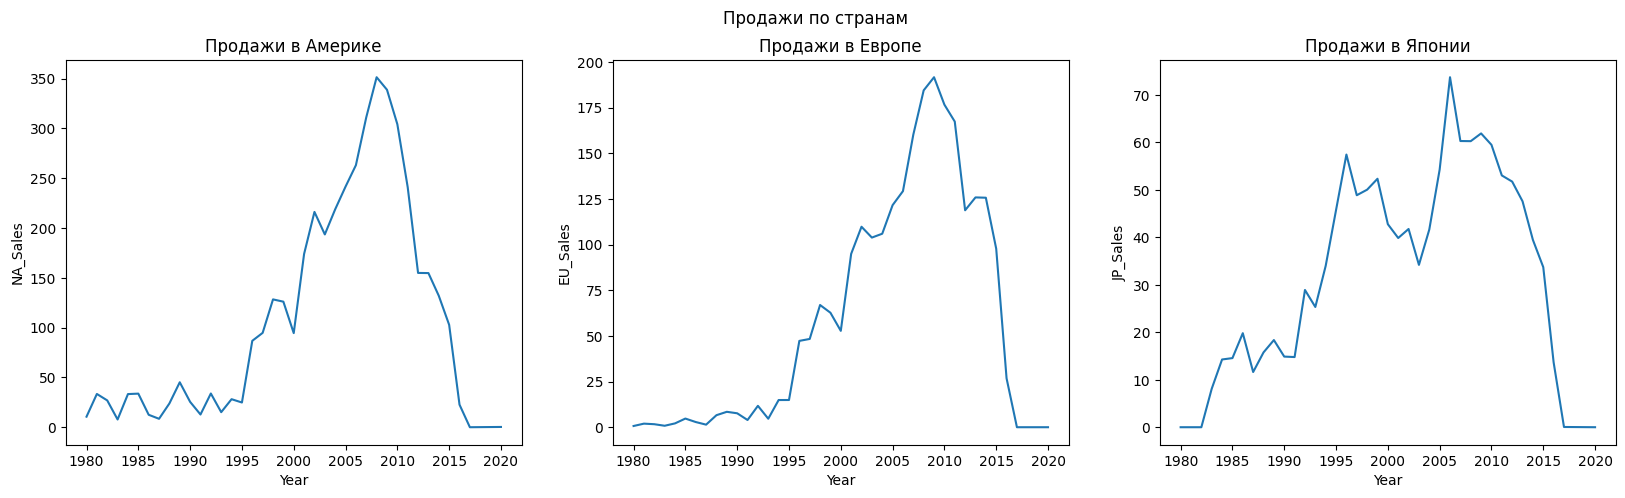

In [62]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Продажи по странам')


sns.lineplot(ax = axes[0], data = dt, x = "Year", y = 'NA_Sales')
axes[0].set_title('Продажи в Америке')


sns.lineplot(ax = axes[1], data = dt, x = "Year", y = 'EU_Sales')
axes[1].set_title('Продажи в Европе')


sns.lineplot(ax = axes[2],data = dt, x = "Year", y = 'JP_Sales')
axes[2].set_title('Продажи в Японии');

В принципе график продаж в Америке и в Европе мало отличается друг от друга, но в Японии продажи довольно высоки не только около 2007 - 2009 года, но в районе 1997 года. В период 1990 - 2000 гг. вышли впервые игры про покемонов, поэтому скорее всего их появление объясняет столь высокие продажи.

### Какие игры входят в топ самых продаваемых игр в Америке, в Европе, в Японии и в остальных странах?

Для каждой страны построим график.

In [63]:
df = data[['Name', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
px.scatter(data_frame = df, x = 'NA_Sales', y = 'Year', size = 'NA_Sales', hover_name = 'Name')

Топ игр в Америке:

1) Wii Sports

2) Super Mario Bros.

3) Duck Hunt

4) Tetris

5) Mario Cart Wii

In [64]:
px.scatter(data_frame = df, x = 'EU_Sales', y = 'Year', size = 'EU_Sales', hover_name = 'Name')

Топ игр в Европе:

1) Wii Sports

2) Mario Cart Wii

3) Wii Sports Resort

4) Nintendogs

5) Grand Theft Auto V

In [65]:
px.scatter(data_frame = df, x = 'JP_Sales', y = 'Year', size = 'JP_Sales', hover_name = 'Name')

Топ игр в Японии:

1) Pokemon Red/Pokemon Blue

2) Pokemon Gold/Pokemon Silver

3) Super Mario Bros.

4) New Super Mario Bros.

5) Pokemon Diamond/Pokemon Perl

Интересно, что Wii Sports не пользовалось большой популярностью в Японии, в отличие от других стран.

In [66]:
px.scatter(data_frame = df, x = 'Other_Sales', y = 'Year', size = 'Other_Sales', hover_name = 'Name')

Топ игр в других странах:

1) Grand Theft Auto: San Andreas

2) Wii Sports

3) Gran Turismo 4

4) Grand Theft Auto V

5) Mario Cart Wii

Различия действительно имеются между странами и они существенны, когда затргивают Японию.

____